# 1. Overview

Based on the descriptive and exploratory analysis done in notebook 00_data_understanding, this Python Script will work on 2 models: logistic and decission tree classifier, we will chose the best model based on the one that has better evaluation metrics. We will then improve the chosen model with tuned hyperparameters.

# 2. Data Understanding

## 2.1 Data Description

This notebook will use the dataset: df_data_processed excel sheet created in the previous notebook: 01_data_preprocessing

## 2.2 Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.exceptions import ConvergenceWarning


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

import pickle
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# 3. Code

## 3.1 Import the database

In [2]:
df = pd.read_excel('df_data_processed.xlsx')
df.head()

,amount_tsh,gps_height,population,basin,region,extraction_type_class,payment_type,source_type,waterpoint_type,installer_type,...,funder_type_international aid,funder_type_ngo,funder_type_private companies,funder_type_religious organizations,scheme_management_grouped_government,scheme_management_grouped_other,scheme_management_grouped_private sector,scheme_management_grouped_water board,status_group,is_test
0,-0.084999,2.053863,-0.041306,-0.540016,-0.633090,-0.521411,-0.897587,-1.112570,-0.510890,-0.005208,...,0,0,0,0,0,0,0,1,0,0
1,-0.100621,-0.965049,-0.379739,-0.540016,0.555492,-0.463637,0.771866,0.850673,-0.359301,3.266280,...,0,0,0,0,1,0,0,0,0,0
2,-0.100621,-0.965049,-0.379739,1.471270,0.131062,2.617222,0.771866,0.850673,2.622191,-0.005208,...,0,0,0,0,1,0,0,0,1,0
3,-0.100621,-0.965049,-0.379739,-1.053126,0.131062,-0.521411,-1.330306,-0.540840,-0.510890,-0.005208,...,1,0,0,0,1,0,0,0,1,0
4,-0.006889,0.511216,-0.125914,0.697368,0.135714,2.617222,-0.641415,0.850673,2.622191,-0.005208,...,0,0,0,0,1,0,0,0,1,0


In [3]:
df.shape

(59400, 36)

## 3.2 Import the database

In [4]:
df_train = df[df['is_test']==0]
df_test = df[df['is_test']==1]

In [5]:
y_train = df_train['status_group']
X_train = df_train.drop(['status_group','is_test'], axis=1)

y_test = df_test['status_group']
X_test = df_test.drop(['status_group','is_test'], axis=1)

## 3.3 Baseline model creations

### 3.3.1 Logistic regression

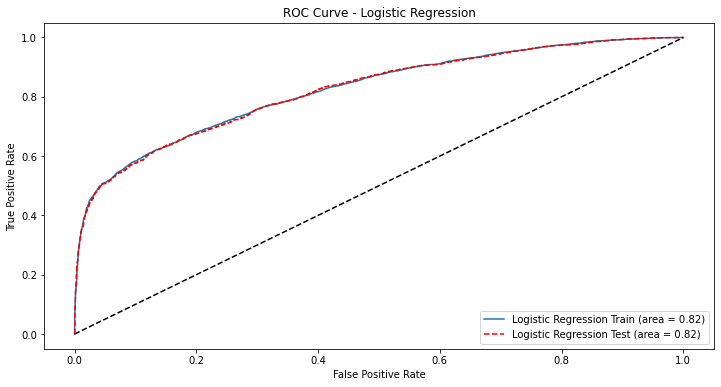

In [6]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Fit the model to the training data
log_reg.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_log_reg_train = log_reg.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_log_reg_test = log_reg.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_log_reg_train, tpr_log_reg_train, _ = roc_curve(y_train, y_pred_prob_log_reg_train)
auc_log_reg_train = auc(fpr_log_reg_train, tpr_log_reg_train)

# Compute ROC curve and AUC for test data
fpr_log_reg_test, tpr_log_reg_test, _ = roc_curve(y_test, y_pred_prob_log_reg_test)
auc_log_reg_test = auc(fpr_log_reg_test, tpr_log_reg_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_log_reg_train, tpr_log_reg_train, label='Logistic Regression Train (area = {:.2f})'.format(auc_log_reg_train))
plt.plot(fpr_log_reg_test, tpr_log_reg_test, color='red', linestyle='--', label='Logistic Regression Test (area = {:.2f})'.format(auc_log_reg_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

### 3.3.2 Decision Tree

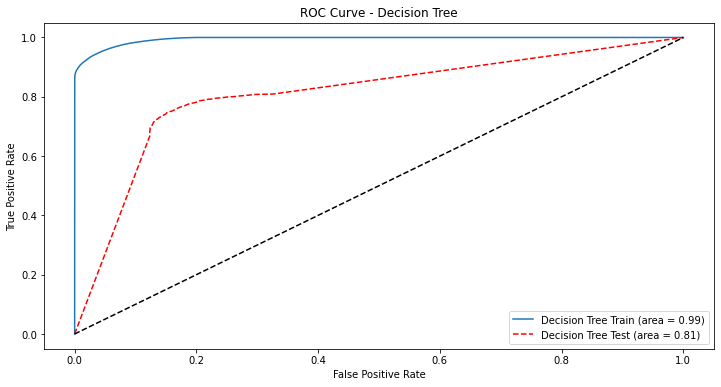

In [7]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_tree_train = decision_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = decision_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

#### checking max_depth to mitigate overfitting

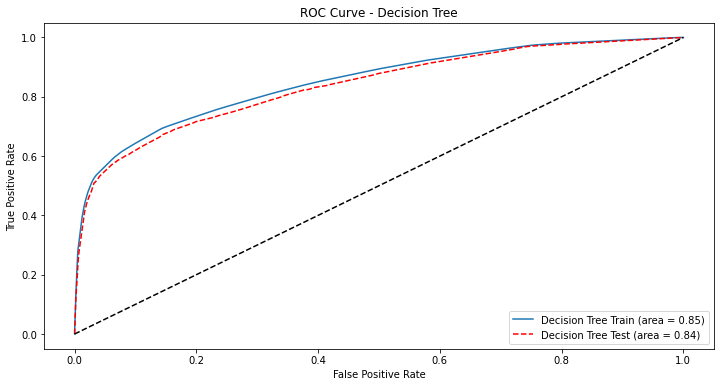

In [8]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(max_depth=7)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predict probabilities on the training and test set
y_pred_prob_tree_train = decision_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = decision_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## 3.4 Hyper tuning with Decision Tree Classifier

### 3.4.1 Decision Tree Classifier

We are going to do hyper parameter tuning with Decision Tree classifier and the Logistic regression and we will keep the model that gives the best results

In [9]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'max_depth': range(5, 10),  # Explore depths from 1 to 20
    'min_samples_split': range(5, 15, 2),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': range(5, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'log2', None]  # Number of features to consider when looking for the best split
}

# Define the scoring function using AUC
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, scoring=scorer, cv=5)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best model
best_tree = grid_search.best_estimator_

# Save the best_tree
pickle.dump(best_tree, open(f"model_objects/best_tree.pickle", 'wb'))

# Output the best parameter combination and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best AUC achieved:", grid_search.best_score_)

# Optional: Evaluate the best model on the test set
y_pred_proba_best_tree = best_tree.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba_best_tree)
print("Test AUC of best model:", test_auc)


Best parameters found: {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 11}
Best AUC achieved: 0.853716977781928
Test AUC of best model: 0.8547557333590005


Let's do the curve ROC and see the values AUC with the values for this Decision TreeClassifier 

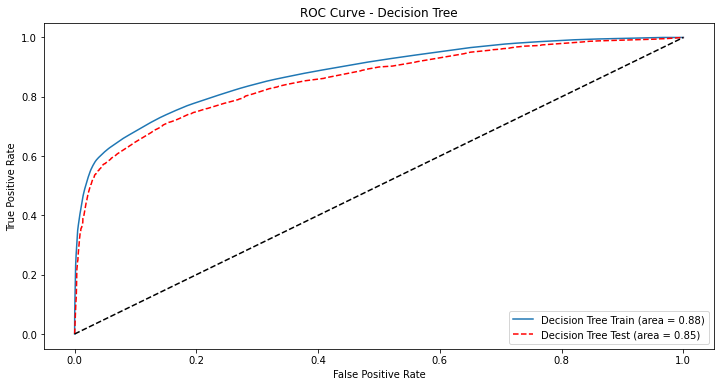

In [10]:
# Predict probabilities on the training and test set
y_pred_prob_tree_train = best_tree.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_tree_test = best_tree.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_tree_train, tpr_tree_train, _ = roc_curve(y_train, y_pred_prob_tree_train)
auc_tree_train = auc(fpr_tree_train, tpr_tree_train)

# Compute ROC curve and AUC for test data
fpr_tree_test, tpr_tree_test, _ = roc_curve(y_test, y_pred_prob_tree_test)
auc_tree_test = auc(fpr_tree_test, tpr_tree_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_tree_train, tpr_tree_train, label='Decision Tree Train (area = {:.2f})'.format(auc_tree_train))
plt.plot(fpr_tree_test, tpr_tree_test, color='red', linestyle='--', label='Decision Tree Test (area = {:.2f})'.format(auc_tree_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

### 3.4.2 logistic regression

In [11]:
# Initialize the Logistic Regression model
logistic_regression = LogisticRegression()

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300],  # Maximum number of iterations taken for the solvers to converge
}

# Define the scoring function using AUC
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Setup the grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, scoring=scorer, cv=5)

# Fit grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best model
best_log_reg = grid_search.best_estimator_

# Output the best parameter combination and the corresponding score
print("Best parameters found:", grid_search.best_params_)
print("Best AUC achieved:", grid_search.best_score_)

# Optional: Evaluate the best model on the test set
y_pred_proba_best_log_reg = best_log_reg.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba_best_log_reg)
print("Test AUC of best model:", test_auc)


Best parameters found: {'C': 100, 'max_iter': 200, 'solver': 'lbfgs'}
Best AUC achieved: 0.8226237659692442
Test AUC of best model: 0.8225152261858072


Let's do the curve ROC and see the values AUC with the values for this Logistic Regressor 

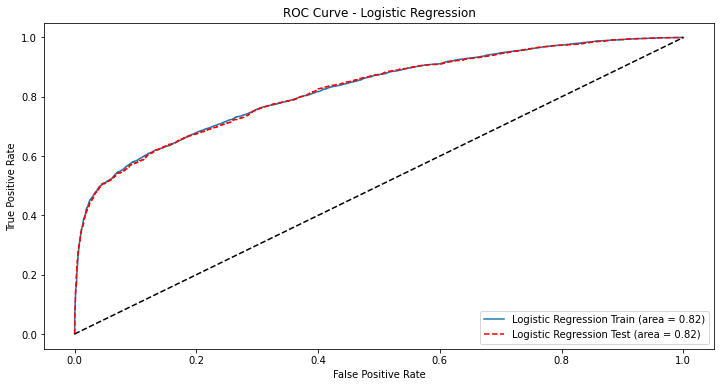

In [12]:
# Predict probabilities on the training and test set using the Logistic Regression model
y_pred_prob_log_reg_train = best_log_reg.predict_proba(X_train)[:, 1]  # Training probabilities
y_pred_prob_log_reg_test = best_log_reg.predict_proba(X_test)[:, 1]  # Test probabilities

# Compute ROC curve and AUC for training data
fpr_log_reg_train, tpr_log_reg_train, _ = roc_curve(y_train, y_pred_prob_log_reg_train)
auc_log_reg_train = auc(fpr_log_reg_train, tpr_log_reg_train)

# Compute ROC curve and AUC for test data
fpr_log_reg_test, tpr_log_reg_test, _ = roc_curve(y_test, y_pred_prob_log_reg_test)
auc_log_reg_test = auc(fpr_log_reg_test, tpr_log_reg_test)

# Plotting ROC Curves
plt.figure(figsize=(12, 6))
plt.plot(fpr_log_reg_train, tpr_log_reg_train, label='Logistic Regression Train (area = {:.2f})'.format(auc_log_reg_train))
plt.plot(fpr_log_reg_test, tpr_log_reg_test, color='red', linestyle='--', label='Logistic Regression Test (area = {:.2f})'.format(auc_log_reg_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# 4. Feature importance

We are now going to execute a feature importance code to be able to see the level of importance of all variables when doing the predictions

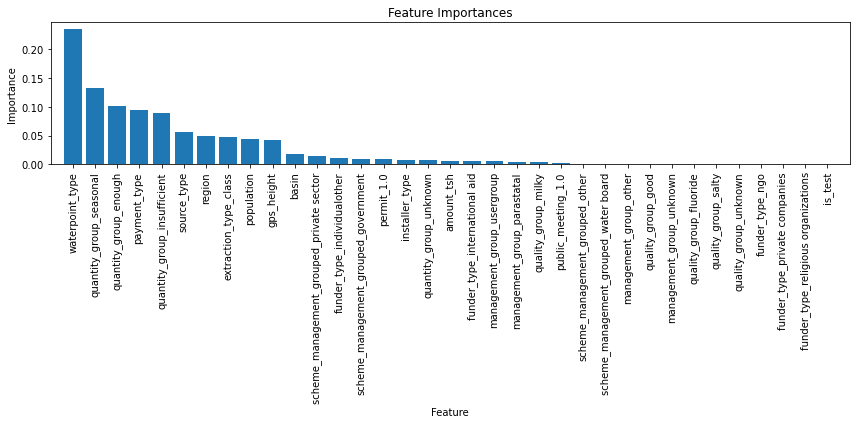

In [13]:
# Obtain the most important features affecting the status of a pump
importances = best_tree.feature_importances_

# Obtener los nombres de las características
feature_names = X_train.columns

# Create a bar graph for the importance of the characteristics 
indexes = np.argsort(importances)[::-1]  # Order importances in descending order

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indexes], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indexes], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# 5. Conclusion

The conclusion of this report is that the best AUC is obtained with a Decision Tree Classifier. As is observable, the AUC is of 0.85 for the test. In the case of the Logistic Regression model, an AUC of 0.82 is obtained for the test.  

The variables that are most important and that permit us to best descriminate are:
1. waterpoint_type
2. quantity_group_seasonal
3. quantity_group_enough
4. payment_type
5. quantity_group_insufficient

We are interested in these 5 variables because they are the ones that have the most influence when determining if a pump is functional or non-functional. 

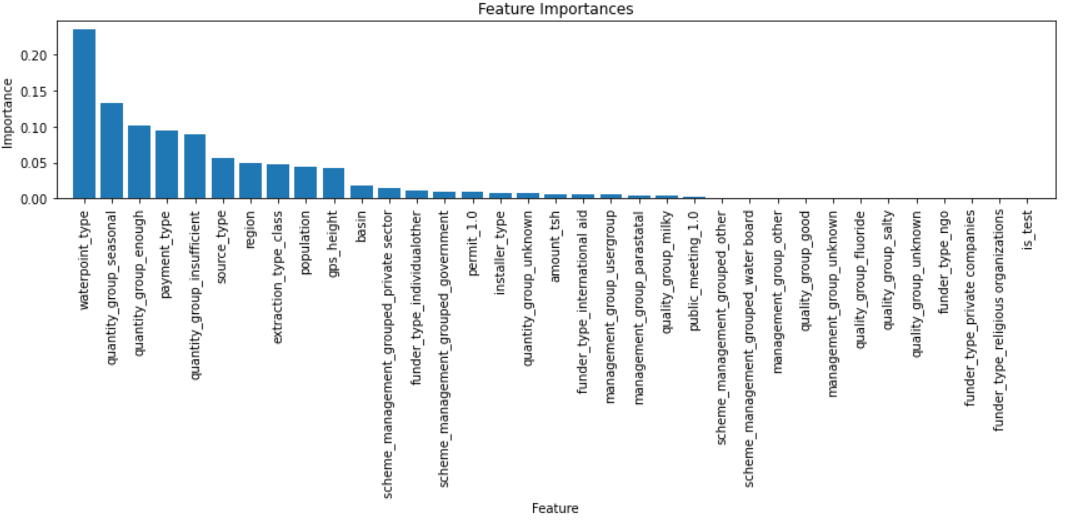